In [54]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data_upload = pd.read_csv('transport_data.csv')
data_upload['log']=data_upload['log']-30
data_upload['lat']=data_upload['lat']-59
print(len(data_upload))

58665


In [55]:
data=data_upload[(data_upload.label!='?') & (data_upload.label!='-')]
print (data.head(5))
print (len(data[data.label=='0']))
print (len(data[data.label=='1']))
print (len(data[data.label=='2']))

         log       lat  request_ts    trans_ts label
0   0.295780  0.932167  1511956827  1511956594     0
8   0.385973  0.944260  1511956827  1511956782     0
13  0.374880  0.938213  1511956827  1511956802     1
17  0.347544  0.932667  1511956827  1511956811     0
23  0.312321  0.937405  1511956827  1511956820     2
4423
3372
2205


In [58]:
from math import sqrt, fabs
def guess(data):
    res=list()
    res.append(9223372036854775807)
    l=0
    k=0
    for index, i in data.iterrows():
        for index, j in data.iterrows():
            if(l!=k):
                dis=math.fabs(math.sqrt((i[0]-j[0])*(i[0]-j[0])+(i[1]-j[1])*(i[1]-j[1])))
                last=res.pop()
                if dis<last:
                    res.append(dis)
                else:
                    res.append(last)
            k+=1
        l+=1
        if(l%100==0):
            display('#########################')
    df=pd.DataFrame(data=lis,columns=['guess'])
    return df
data['guess']=guess(data[['log','lat']])

KeyboardInterrupt: 

In [3]:
display((data['request_ts']-data['trans_ts']).max())
display((data['request_ts']-data['trans_ts']).min())
display((data['request_ts']-data['trans_ts']).mean())
display((data['request_ts']-data['trans_ts']).median())
display((data['guess']).head())

1250

-55

37.7503

16.0

(10000,)

(9964, 1)

(array([9071.,  604.,   78.,   39.,   38.,   33.,   32.,   27.,   22.,
          20.]),
 array([-55. ,  49.8, 154.6, 259.4, 364.2, 469. , 573.8, 678.6, 783.4,
        888.2, 993. ]),
 <a list of 10 Patch objects>)

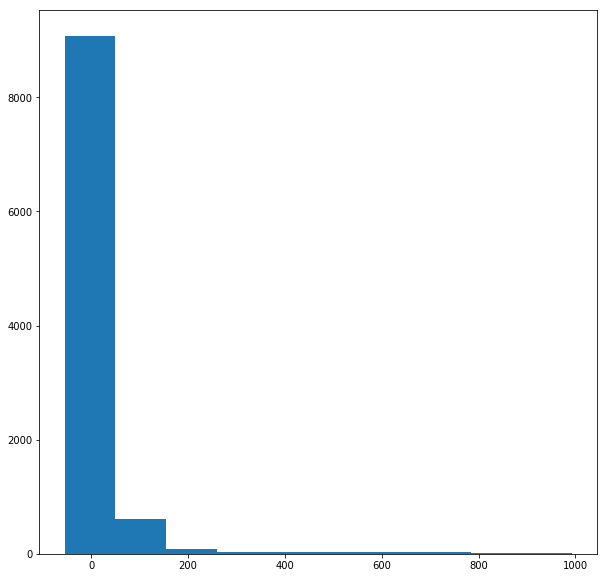

In [4]:
plotdata = (data['request_ts']-data['trans_ts'])
display(plotdata.shape)
plotdata = pd.DataFrame(data=plotdata,columns=['dif'])
plotdata=plotdata.loc[plotdata['dif'] <1000]
display(plotdata.shape)
fig, axs = plt.subplots(figsize=(10, 10))
axs.hist(plotdata['dif'])
#data=data.loc[(data['request_ts']-data['trans_ts']) < 1000]
#axs.hist(plotdata['trans_ts'])
#axs.scatter(plotdata['request_ts'], plotdata['trans_ts'])

0.41590118408203125

0.21383285522460938

0.3424026561737061

0.3495340347290057

0.9700813293457031

0.9232711791992188

0.9350986698150635

0.9339904785156179

0.9571762084961009

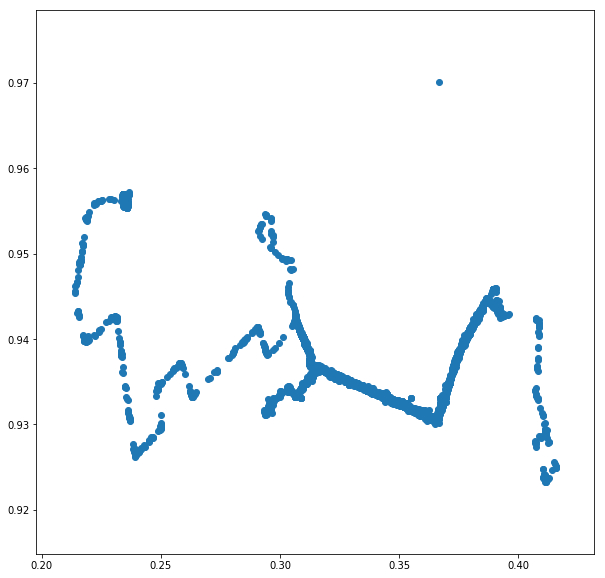

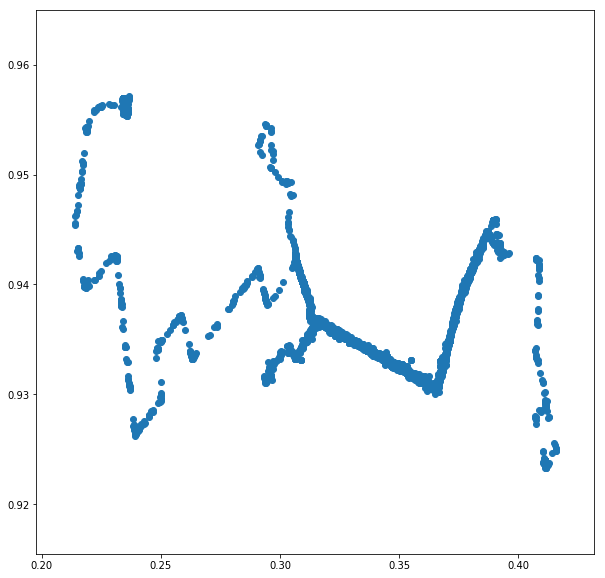

In [5]:
maxxx=data['lat'].max()
display(data['log'].max())
display(data['log'].min())
display(data['log'].mean())
display(data['log'].median())
display(data['lat'].max())
display(data['lat'].min())
display(data['lat'].mean())
display(data['lat'].median())
plotdata = data[['log','lat']]
fig, axs = plt.subplots( figsize=(10, 10))
axs.scatter(plotdata['log'], plotdata['lat'])

data=data.loc[data['lat'] != maxxx]
display(data['lat'].max())
plotdata = data[['log','lat']]
fig, axs = plt.subplots( figsize=(10, 10))
axs.scatter(plotdata['log'], plotdata['lat'])

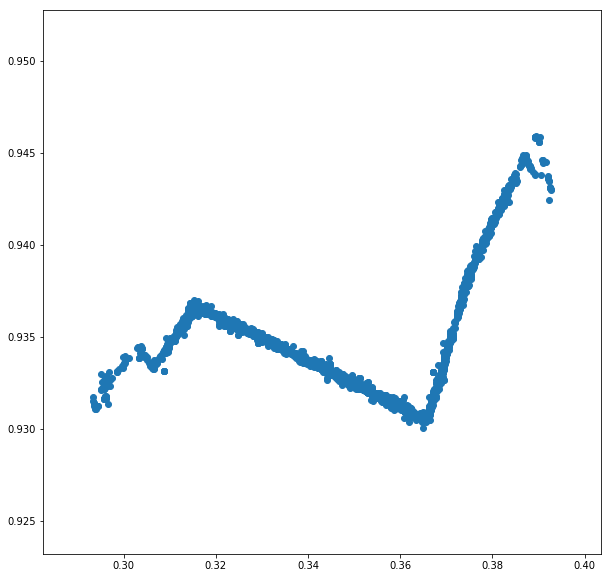

In [6]:
test=data.loc[data['label'] == '0']
plotdata = test[['log','lat']]
fig, axs = plt.subplots( figsize=(10, 10))
axs.scatter(plotdata['log'], plotdata['lat'])

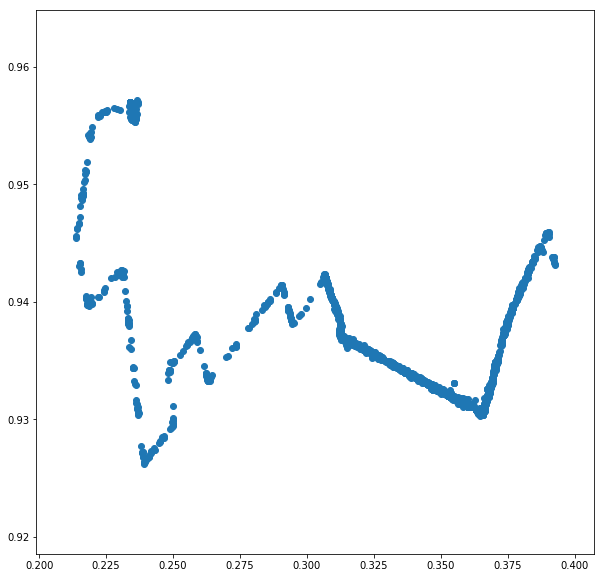

In [7]:
test1=data.loc[data['label'] == '1']
plotdata = test1[['log','lat']]
fig, axs = plt.subplots( figsize=(10, 10))
axs.scatter(plotdata['log'], plotdata['lat'])

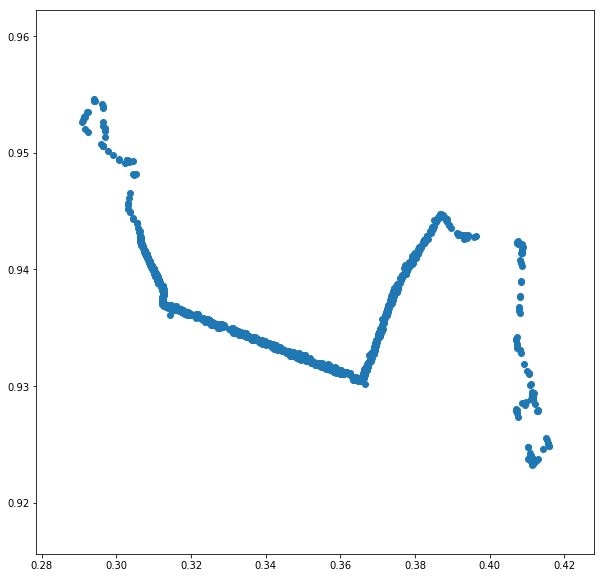

In [8]:
test2=data.loc[data['label'] == '2']
plotdata = test2[['log','lat']]
fig, axs = plt.subplots( figsize=(10, 10))
axs.scatter(plotdata['log'], plotdata['lat'])

In [9]:
questions=data_upload[data_upload.label=='?']
questions=questions.drop(['label'],axis=1)
print (questions.head(5))
print (len(questions))

         log       lat  request_ts    trans_ts
11  0.359190  0.931217  1511956827  1511956787
18  0.355488  0.931679  1511956827  1511956811
41  0.312258  0.937222  1511956918  1511956905
42  0.367332  0.931988  1511956918  1511956907
56  0.329239  0.934929  1511956978  1511956967
5000


In [ ]:
from math import sqrt, fabs
def guess_ques(ques,data):
    res=list()
    res.append(9223372036854775807)
    l=0
    k=0
    for index, i in ques.iterrows():
        for index, j in data.iterrows():
            if(l!=k):
                dis=math.fabs(math.sqrt((i[0]-j[0])*(i[0]-j[0])+(i[1]-j[1])*(i[1]-j[1])))
                last=res.pop()
                if dis<last:
                    res.append(dis)
                else:
                    res.append(last)
            k+=1
        l+=1
        if(l%100==0):
            display('#########################')
    df=pd.DataFrame(data=lis,columns=['guess'])
    return df
questions['guess']=questions(questions[['log','lat']],data[['log','lat']])

In [10]:
display((questions['request_ts']-questions['trans_ts']).max())
display((questions['request_ts']-questions['trans_ts']).min())
display((questions['request_ts']-questions['trans_ts']).mean())
display((questions['request_ts']-questions['trans_ts']).median())
plotdata = (questions['request_ts']-questions['trans_ts'])
plotdata = pd.DataFrame(data=plotdata,columns=['dif'])
display(plotdata.shape)
plotdata=plotdata.loc[plotdata['dif']<0]
display(plotdata.shape)
#fig, axs = plt.subplots(figsize=(10, 10))
#axs.hist(plotdata['dif'])
print (len(questions))

1237

0

44.4552

17.0

(5000, 1)

(0, 1)

5000


0.4159889221191406

0.4159889221191406

0.21363449096680043

0.3275340156555176

0.33731746673583984

0.9701843261718821

0.9233016967773438

0.9370807746887208

0.9346332550048828

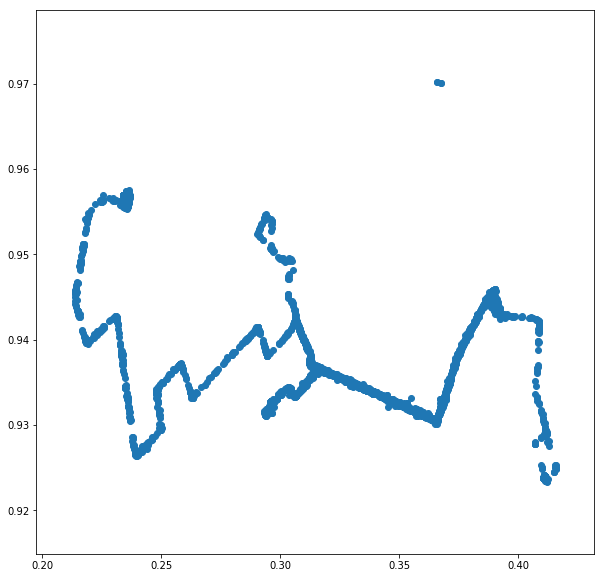

In [11]:
maxxx=questions['lat'].max()
display(questions['log'].max())
#questions=questions.loc[questions['lat'] < 0.96]
plotdata = questions[['log','lat']]
display(questions['log'].max())
display(questions['log'].min())
display(questions['log'].mean())
display(questions['log'].median())
display(questions['lat'].max())
display(questions['lat'].min())
display(questions['lat'].mean())
display(questions['lat'].median())

fig, axs = plt.subplots( figsize=(10, 10))
axs.scatter(plotdata['log'], plotdata['lat'])

In [12]:
bad_data=data_upload[data_upload.label=='-']

print (bad_data.head(5))
print (len(bad_data))

        log       lat  request_ts    trans_ts label
1  0.219528  0.954617  1511956827  1511956746     -
2  0.409101  0.931679  1511956827  1511956747     -
3  0.293602  0.938892  1511956827  1511956759     -
4  0.360102  0.931103  1511956827  1511956767     -
5  0.309683  0.940006  1511956827  1511956769     -
43665


0.41661643981933594

0.21335411071776988

0.31777552053525143

0.3131980895996094

0.9701919555664062

0.9224357604980469

0.938349797834062

0.9358100891113281

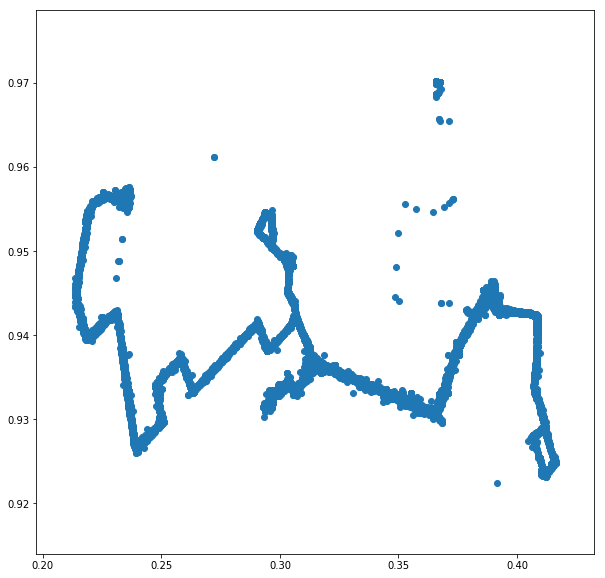

In [13]:
plotdata = bad_data[['log','lat']]
display(bad_data['log'].max())
display(bad_data['log'].min())
display(bad_data['log'].mean())
display(bad_data['log'].median())
display(bad_data['lat'].max())
display(bad_data['lat'].min())
display(bad_data['lat'].mean())
display(bad_data['lat'].median())

fig, axs = plt.subplots( figsize=(10, 10))
axs.scatter(plotdata['log'], plotdata['lat'])

In [14]:
somemore=pd.merge(data, bad_data, on=['log', 'lat'], how='inner')
display(len(somemore))
display(somemore.head())

58439

log       lat  request_ts_x  trans_ts_x label_x  request_ts_y  \
0  0.29578  0.932167    1511956827  1511956594       0    1511956948   
1  0.29578  0.932167    1511956827  1511956594       0    1511957190   
2  0.29578  0.932167    1511956827  1511956594       0    1511957310   
3  0.29578  0.932167    1511956827  1511956594       0    1511975562   
4  0.29578  0.932167    1511956827  1511956594       0    1512026532   

   trans_ts_y label_y  
0  1511956936       -  
1  1511956981       -  
2  1511956981       -  
3  1511975540       -  
4  1512026521       -

In [15]:
samepos_data=somemore[['log','lat','request_ts_y','trans_ts_y','label_x','guess_x']]

samepos_data=samepos_data.rename(index=str, columns={'guess_x':'guess','request_ts_y': 'request_ts',
                                                     'trans_ts_y': 'trans_ts','label_x': 'label'})
display(len(samepos_data))
display(samepos_data.head())
data=data.append(samepos_data, ignore_index=True)

58439

log       lat  request_ts    trans_ts label
0  0.29578  0.932167  1511956948  1511956936     0
1  0.29578  0.932167  1511957190  1511956981     0
2  0.29578  0.932167  1511957310  1511956981     0
3  0.29578  0.932167  1511975562  1511975540     0
4  0.29578  0.932167  1512026532  1512026521     0

In [667]:
data=data.append(samepos_data, ignore_index=True)
time1=pd.DataFrame(index=data.index.copy(),columns=['day'])
time2=pd.DataFrame(index=data.index.copy(),columns=['hour'])
time3=pd.DataFrame(index=data.index.copy(),columns=['minute'])
time4=pd.DataFrame(index=data.index.copy(),columns=['sec'])
time5=pd.DataFrame(index=data.index.copy(),columns=['request_ts'])
for index, row in data.iterrows():
    y=datetime.fromtimestamp(row['request_ts'])
    time1.at[index,'day']=y.day
    time2.at[index,'hour']=y.hour
    time3.at[index,'minute']=y.minute   
    time4.at[index,'sec']=y.second
data['day_sat']=time1
data['hour_sat']=time2
data['minute_sat']=time3
data['sec_sat']=time4

for index, row in data.iterrows():
    y=datetime.fromtimestamp(row['trans_ts'])
    time1.at[index,'day']=y.day
    time2.at[index,'hour']=y.hour
    time3.at[index,'minute']=y.minute   
    time4.at[index,'sec']=y.second
data['day']=time1
data['hour']=time2
data['minute']=time3
data['sec']=time4
print (data.head(5))

        log       lat  request_ts    trans_ts label day_sat hour_sat  \
0  0.295780  0.932167  1511956827  1511956594     0      29       15   
1  0.385973  0.944260  1511956827  1511956782     0      29       15   
2  0.374880  0.938213  1511956827  1511956802     1      29       15   
3  0.347544  0.932667  1511956827  1511956811     0      29       15   
4  0.312321  0.937405  1511956827  1511956820     2      29       15   

  minute_sat sec_sat day hour minute sec  
0          0      27  29   14     56  34  
1          0      27  29   14     59  42  
2          0      27  29   15      0   2  
3          0      27  29   15      0  11  
4          0      27  29   15      0  20  


In [668]:
time1=pd.DataFrame(index=data.index.copy(),columns=['day'])
time2=pd.DataFrame(index=data.index.copy(),columns=['hour'])
time3=pd.DataFrame(index=data.index.copy(),columns=['minute'])
time4=pd.DataFrame(index=data.index.copy(),columns=['sec'])
time5=pd.DataFrame(index=data.index.copy(),columns=['request_ts'])
for index, row in questions.iterrows():
    y=datetime.fromtimestamp(row['request_ts'])
    time1.at[index,'day']=y.day
    time2.at[index,'hour']=y.hour
    time3.at[index,'minute']=y.minute   
    time4.at[index,'sec']=y.second
questions['day_sat']=time1
questions['hour_sat']=time2
questions['minute_sat']=time3
questions['sec_sat']=time4

for index, row in questions.iterrows():
    y=datetime.fromtimestamp(row['trans_ts'])
    time1.at[index,'day']=y.day
    time2.at[index,'hour']=y.hour
    time3.at[index,'minute']=y.minute   
    time4.at[index,'sec']=y.second
questions['day']=time1
questions['hour']=time2
questions['minute']=time3
questions['sec']=time4
print (questions.head(5))

         log       lat  request_ts    trans_ts day_sat hour_sat minute_sat  \
11  0.359190  0.931217  1511956827  1511956787      29       15          0   
18  0.355488  0.931679  1511956827  1511956811      29       15          0   
41  0.312258  0.937222  1511956918  1511956905      29       15          1   
42  0.367332  0.931988  1511956918  1511956907      29       15          1   
56  0.329239  0.934929  1511956978  1511956967      29       15          2   

   sec_sat day hour minute sec  
11      27  29   14     59  47  
18      27  29   15      0  11  
41      58  29   15      1  45  
42      58  29   15      1  47  
56      58  29   15      2  47  


In [681]:
rf=RandomForestClassifier(n_estimators = 200, max_features = 10, criterion = 'entropy', oob_score = True,  n_jobs = -1, random_state = 42)
ab=AdaBoostClassifier(n_estimators = 200 ,random_state = 42)
dt=DecisionTreeClassifier(max_features=10, random_state=42, max_leaf_nodes=20)
X = data[['log','lat','day','hour','minute','sec','day_sat','hour_sat','minute_sat','sec_sat']]

y = data['label']

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler().fit(X)

X_train = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.60, random_state=42)

In [682]:
dt.fit(X_train, y_train)
accuracy = dt.score(X_test, y_test)
print (accuracy)
z=dt.predict(X_test)
print (z)
print(metrics.classification_report(y_test, z))

0.6355599931812094
['0' '0' '0' ... '1' '0' '0']
              precision    recall  f1-score   support

           0       0.58      0.90      0.70     16541
           1       0.81      0.54      0.64     16707
           2       0.52      0.30      0.38      7815

   micro avg       0.64      0.64      0.64     41063
   macro avg       0.64      0.58      0.58     41063
weighted avg       0.66      0.64      0.62     41063



In [683]:
rf.fit(X_train, y_train)
accuracy = rf.score(X_test, y_test)
print (accuracy)
z=rf.predict(X_test)
print (z)
print(metrics.classification_report(y_test, z))

0.639675620388184
['0' '0' '0' ... '1' '0' '0']
              precision    recall  f1-score   support

           0       0.62      0.74      0.68     16541
           1       0.70      0.66      0.68     16707
           2       0.53      0.37      0.43      7815

   micro avg       0.64      0.64      0.64     41063
   macro avg       0.62      0.59      0.60     41063
weighted avg       0.64      0.64      0.63     41063



In [684]:
ab.fit(X_train, y_train)
accuracy = ab.score(X_test, y_test)
print (accuracy)
z=ab.predict(X_test)
print (z)
print(metrics.classification_report(y_test, z))

0.6459342960816307
['0' '0' '0' ... '1' '0' '0']
              precision    recall  f1-score   support

           0       0.59      0.87      0.70     16541
           1       0.76      0.60      0.67     16707
           2       0.65      0.27      0.38      7815

   micro avg       0.65      0.65      0.65     41063
   macro avg       0.66      0.58      0.58     41063
weighted avg       0.67      0.65      0.63     41063



In [646]:
questions=questions.drop(['trans_ts','request_ts'],axis=1)
rf.fit(X, y) 
out = open('transport_RF_200_standscale_635.txt', 'w')
z=rf.predict(questions)
from collections import Counter
print (Counter(z))
for i in z:
    out.write(i + '\n') 
out.close()

Counter({'0': 2278, '1': 1905, '2': 817})


In [676]:
questions=questions.drop(['trans_ts','request_ts'],axis=1)
dt.fit(X, y) 
out = open('transport_decisiontree_100_standscale_668649.txt', 'w')
z=dt.predict(questions)
from collections import Counter
print (Counter(z))
for i in z:
    out.write(i + '\n') 
out.close()

Counter({'0': 3225, '1': 1126, '2': 649})


In [648]:
#questions=questions.drop(['trans_ts','request_ts'],axis=1)
ab.fit(X, y) 
out = open('transport_adaboost_200_standscale_647.txt', 'w')
z=ab.predict(questions)
from collections import Counter
print (Counter(z))
for i in z:
    out.write(i + '\n') 
out.close()

Counter({'0': 3116, '1': 1450, '2': 434})
